In [13]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 8.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 7.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [9]:
# Divide data in X and Y 

X = df.loc[:, ["RM", "LSTAT", "PTRATIO"]]
Y = df.loc[:, ["MEDV"]]

X.shape, Y.shape

((489, 3), (489, 1))

In [11]:
# Train test split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=10)

In [12]:
# Normalizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
# MODEL -> DEEP LEARNING PART

import tensorflow as tf

# get model
model = tf.keras.models.Sequential()


# add layers to model

'''
3 -> in input shape indicates the 3 columns from input


Doubts:
- tf.keras.layers.Dense => can we make this a variable and then use it?
- why does the output layer require linear activation function

'''



model.add(tf.keras.layers.Dense(128, input_shape=(3,), activation='relu', name='input'))
model.add(tf.keras.layers.Dense(64, activation='relu', name='layer1'))
model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               512       
                                                                 
 layer1 (Dense)              (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 0s 6ms/step - loss: 236025888768.0000 - mae: 455517.9375 - val_loss: 187415773184.0000 - val_mae: 402535.7500
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 236024987648.0000 - mae: 455517.0000 - val_loss: 187414806528.0000 - val_mae: 402534.5000
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 236023758848.0000 - mae: 455515.7188 - val_loss: 187413397504.0000 - val_mae: 402532.7188
Epoch 4/100
11/11 [==============================] - 0s 1ms/step - loss: 236021891072.0000 - mae: 455513.7812 - val_loss: 187411365888.0000 - val_mae: 402530.0938
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 236019187712.0000 - mae: 455510.9062 - val_loss: 187408416768.0000 - val_mae: 402526.4062
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 236015271936.0000 - mae: 455506.9375 - val_loss: 187404337152.0000 - val_mae: 402521.2500
Epoch 7/100
11/11 [===

In [27]:
y_pred = model.predict(x=x_test)

4/4 [==============================] - 0s 1ms/step


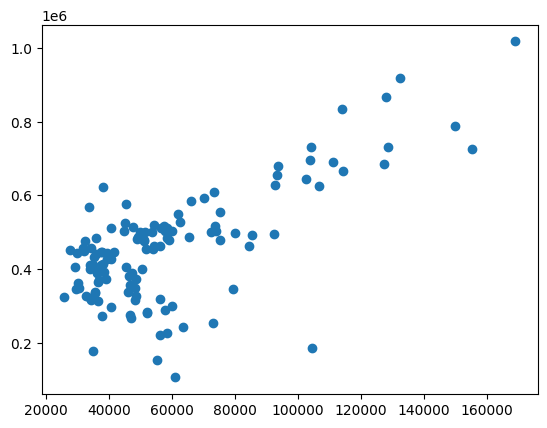

In [28]:
plt.scatter(y_pred, y_test)